In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline

In [3]:
df = pd.read_csv('Ecommerce Customers')

In [4]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


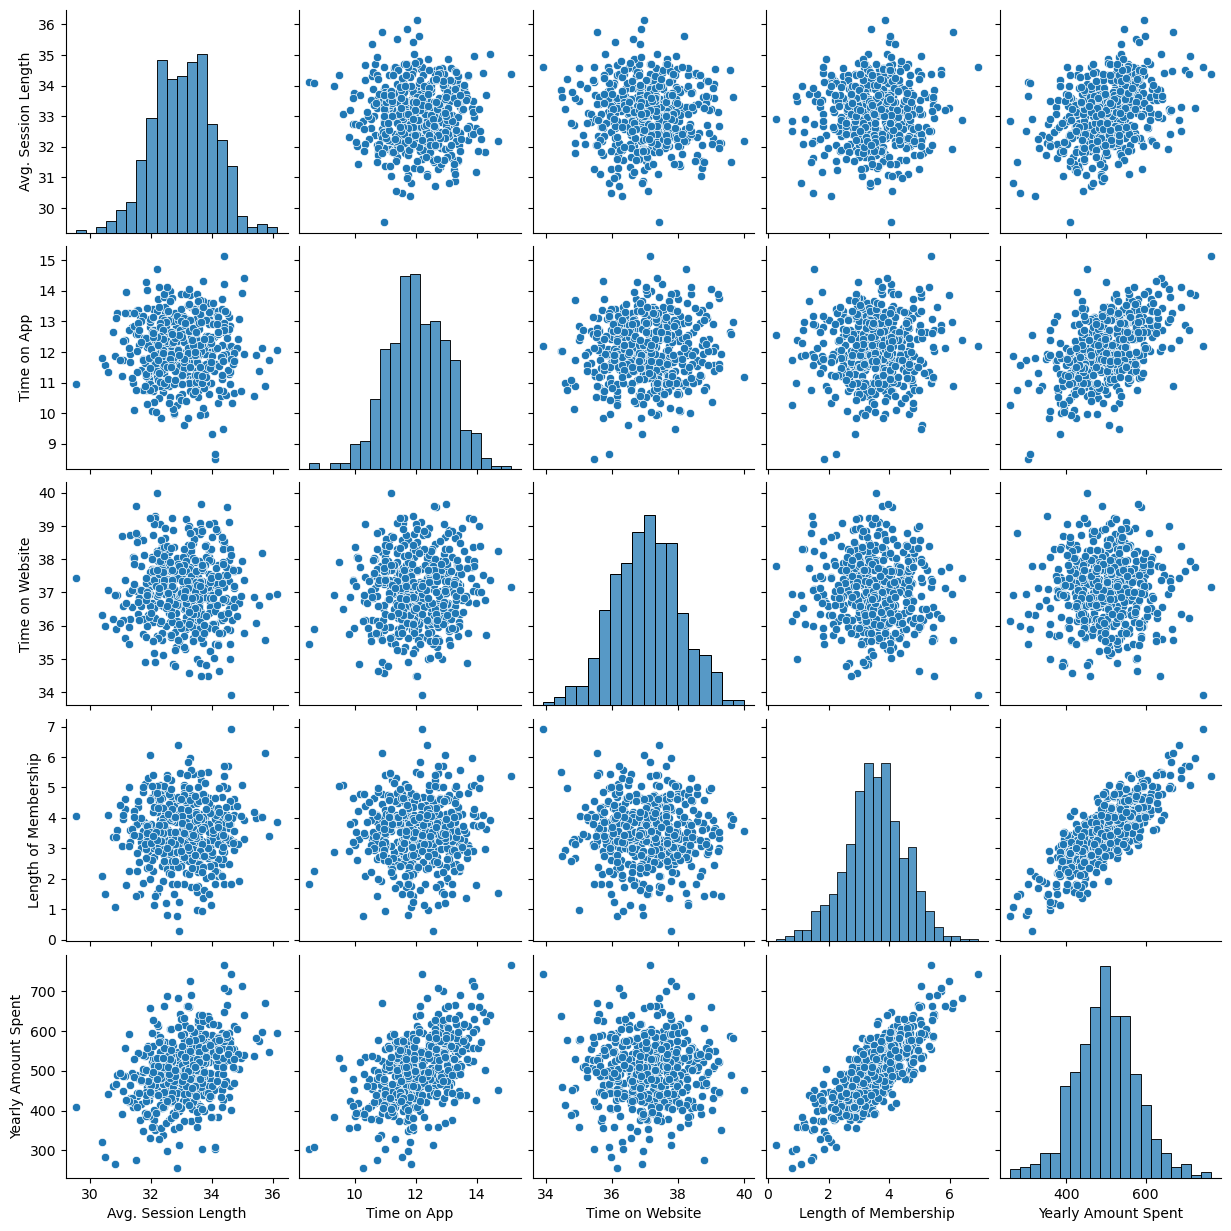

In [7]:
sns.pairplot(df)

<AxesSubplot:>

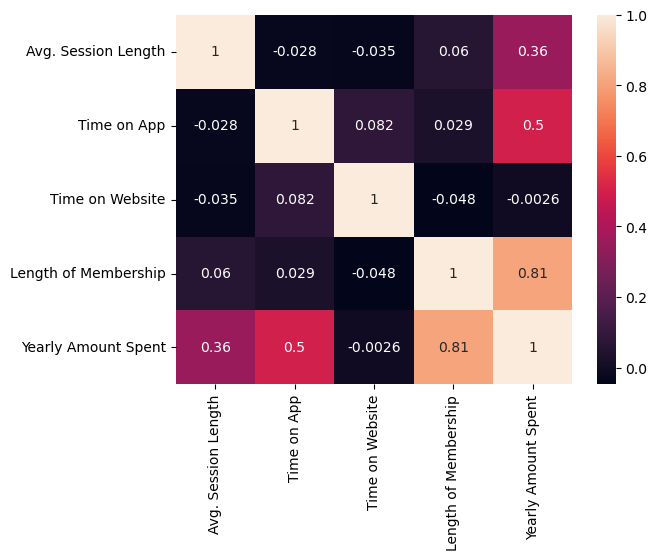

In [10]:
sns.heatmap(df.corr(),annot=True)

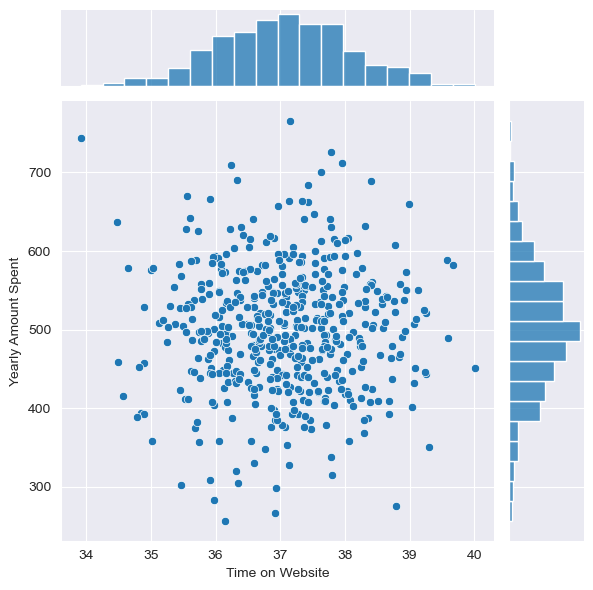

In [12]:
sns.set_style('darkgrid')

sns.jointplot(data=df,x='Time on Website',y='Yearly Amount Spent')

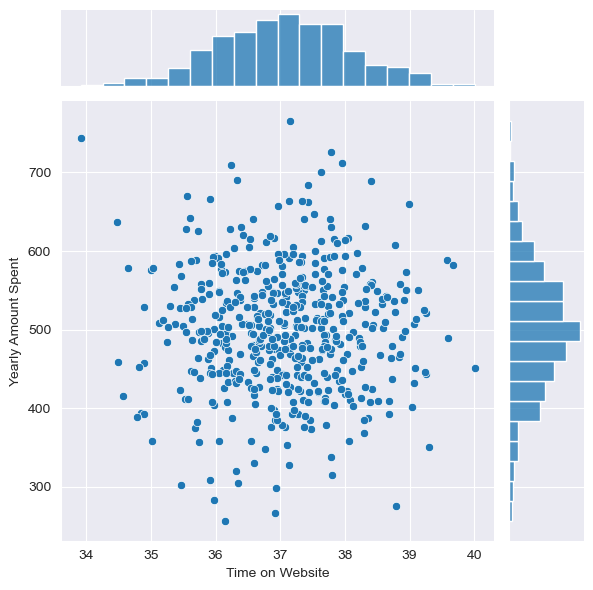

In [13]:
sns.jointplot(data=df,x='Time on Website',y='Yearly Amount Spent')

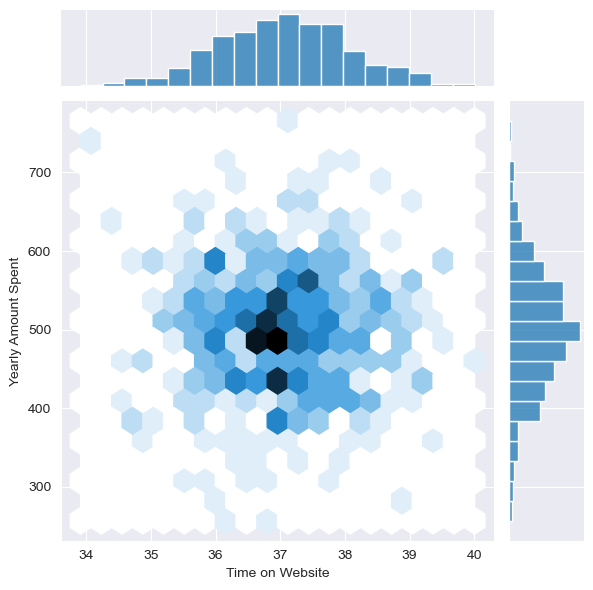

In [15]:
sns.jointplot(data=df,x='Time on Website',y='Yearly Amount Spent',kind='hex')

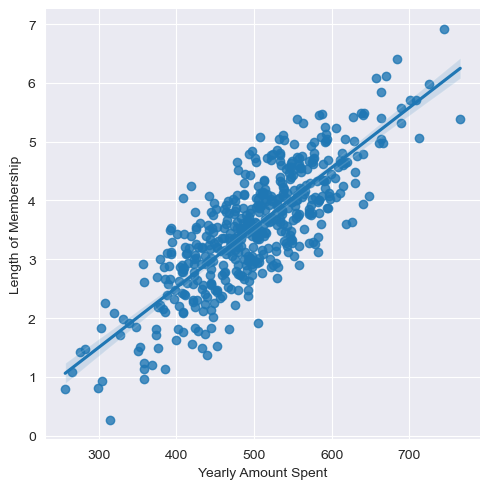

In [16]:
sns.lmplot(data=df,x='Yearly Amount Spent', y='Length of Membership')

In [18]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [21]:
X = df[['Avg. Session Length', 'Time on App', 'Length of Membership', 'Yearly Amount Spent','Time on Website']]
y = df['Yearly Amount Spent']

In [23]:
from sklearn.model_selection import train_test_split



In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [26]:
from sklearn.linear_model import LinearRegression

In [31]:
lm= LinearRegression()

In [32]:
lm.fit(X=X_train,y=y_train)

LinearRegression()

In [33]:
pridic =lm.predict(X_test)

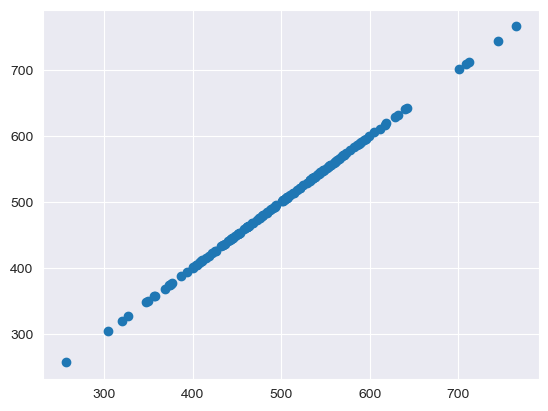

In [34]:
plt.scatter(y_test,pridic)

<AxesSubplot:xlabel='Yearly Amount Spent'>

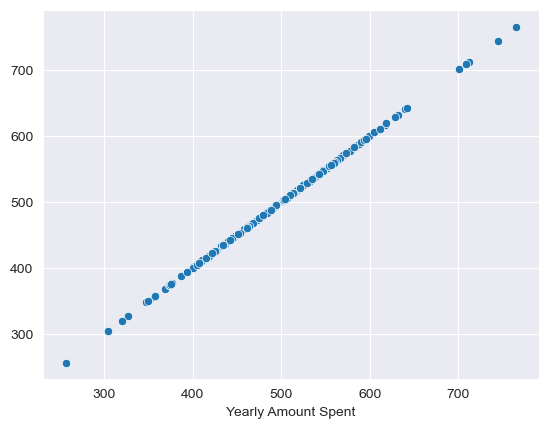

In [35]:
sns.scatterplot(x=y_test,y=pridic)

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Count'>

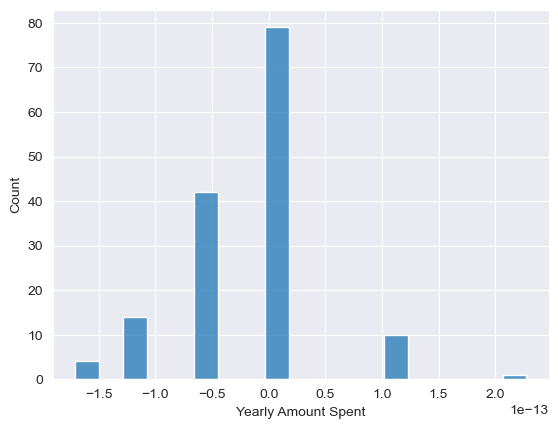

In [36]:
sns.histplot(y_test-pridic)

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

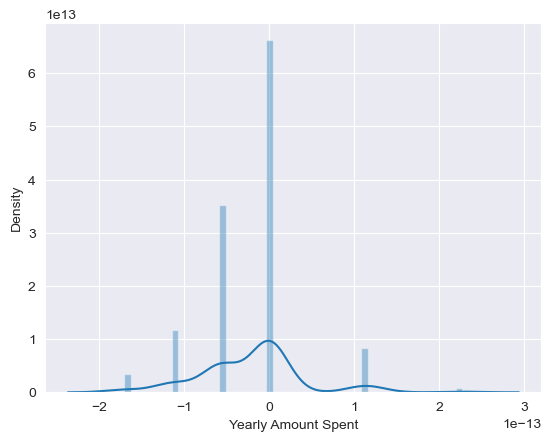

In [44]:
sns.distplot(y_test-pridic,bins=50)

In [45]:
from sklearn import metrics

In [39]:
mtc = metrics


In [40]:
mtc.mean_absolute_error(y_test,pridic)

4.016934932830433e-14

In [41]:
np.sqrt(mtc.mean_absolute_error(y_test,pridic))

2.0042292615443056e-07

In [42]:
mtc.mean_squared_error(y_test,pridic)

4.092820739194668e-27

In [43]:
np.sqrt(mtc.mean_squared_error(y_test,pridic))

6.397515720336034e-14

In [46]:
lm.coef_

array([-2.12454138e-14, -8.07083734e-15, -4.10778440e-14,  1.00000000e+00,
       -1.16855841e-16])

In [47]:
X.columns

Index(['Avg. Session Length', 'Time on App', 'Length of Membership',
       'Yearly Amount Spent', 'Time on Website'],
      dtype='object')

In [52]:
coef0 =pd.DataFrame(data=lm.coef_,index=X.columns)

In [53]:
coef0

,0
Avg. Session Length,-2.124541e-14
Time on App,-8.070837e-15
Length of Membership,-4.107784e-14
Yearly Amount Spent,1.000000e+00
Time on Website,-1.168558e-16
